In [23]:
import wave

file = open("recording.wav", "rb")
s = file.read(44)
print(s)

b'RIFF$p\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x00p\x01\x00'


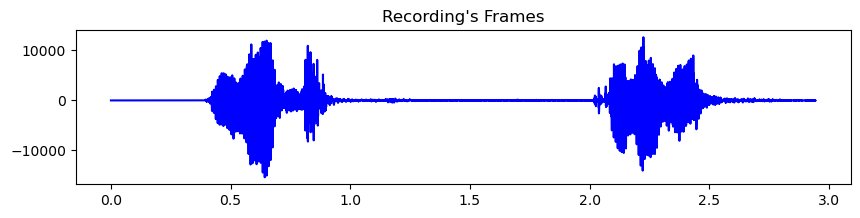

In [25]:
#import
import wave as we
import numpy as np
import matplotlib.pyplot as plt

def wavread(path):
    wavfile =  we.open(path,"rb")
    params = wavfile.getparams()
    framesra,frameswav= params[2],params[3]
    datawav = wavfile.readframes(frameswav)
    wavfile.close()
    datause = np.frombuffer(datawav,dtype = np.short)
    datause.shape = -1,1
    datause = datause.T
    time = np.arange(0, frameswav) * (1.0/framesra)
    return datause,time

def plot():
    path = 'recording.wav'
    wavdata,wavtime = wavread(path)
    fig = plt.figure(figsize=(10, 2))
    plt.title("Recording's Frames")
    plt.plot(wavtime, wavdata[0], color = 'blue')
    plt.show()

plot()

In [74]:
import math
path = 'recording.wav'
framelen = 1

test = True
wavdata,wavtime = wavread(path)
raw = wavdata[0].tolist()
energy = []
rep = len(raw) - framelen
for pointer_raw in range(0,rep,framelen):
    energy_frame = 0
    for i in range(framelen):
        energy_frame += raw[framelen + pointer_raw] ** 2
    if energy_frame!=0:
        energy.append(math.log(energy_frame) * 10)
    else:
        energy.append(0.0)
len(energy)

47103

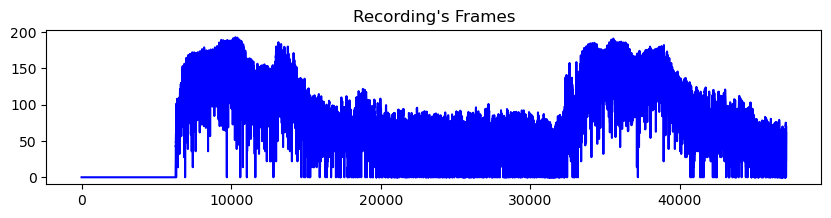

In [75]:
l = len(energy)
index = []
for i in range (l):
    index.append(i)
fig = plt.figure(figsize=(10, 2))
plt.title("Recording's Frames")
plt.plot(index, energy, color = 'blue')
plt.show()